In [4]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

In [6]:
# can probs get it down to O(n)
def S_euler(S0, sigma, r, T, N = 1000):
    M = 1000 # how many turns in each path
    dt = T/M
    paths = []

    for i in range(N): # iterating for each path
        S = np.zeros(M+1) # stock path for one of them
        S[0] = S0 # intial stock price is S0

        for n in range(M):
            epsilon = np.random.normal(loc = 0, scale = 1) # sample change from norm dist
            S[n+1] = S[n] + r * S[n] * dt + sigma * S[n] * np.sqrt(dt) * epsilon # plugging each into euler formula

        paths.append(S) # adding the path to the bank
        
    return paths

In [64]:
paths = S_euler(100, 0.25, 0.07, 1, 10)


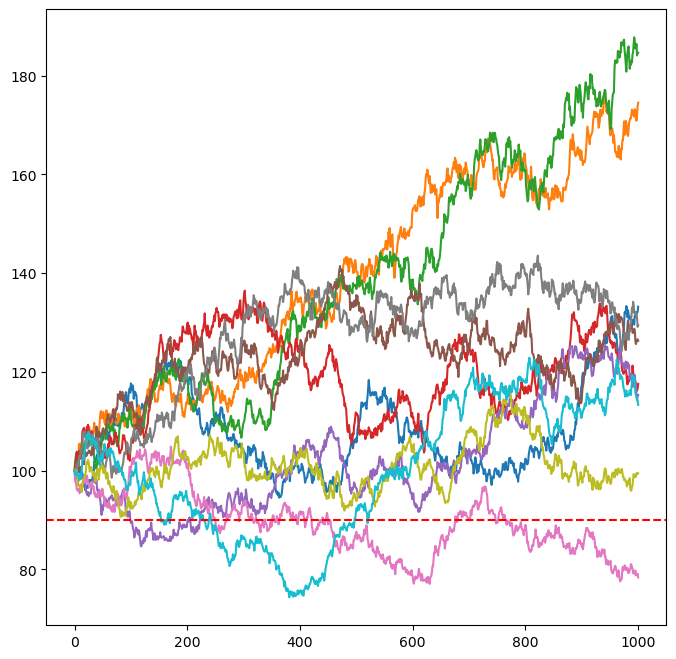

In [66]:
fig, ax = subplots(figsize = (8, 8))
for i in range(len(paths)): # just plotting everything
    ax.plot(paths[i])
# ye looks good

# barrier
ax.axhline(90, c = 'r', ls = '--')

In [62]:
def barrierPutPrice(S0, sigma, r, T, K, bar):
    paths = np.array(S_euler(100, 0.25, 0.07, 1))

    payoffs = []
    for path in paths:
        # exercisable
        if np.min(path) > bar:
            payoffs.append(np.maximum(path[-1] - K, 0))
        # not exercisable
        else:
            payoffs.append(0)

    price = np.e ** (-r * T) * np.mean(payoffs) # formula 
    return price

In [60]:
barrierPutPrice(100, 0.25, 0.07, 1, 100, 90)

10.745847619833519